# Modulo 4: Evaluacion
## Alumno: Jose Suarez

### Ejercicio 1:
La siguiente tabla corresponde a las edades de los niños que asistieron a un centro de salud.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="darkgrid", palette=['#582572','#582572','#582572'],
              context="notebook",font_scale=1.5, rc={'figure.facecolor':'#6F2F91',
                                                     'axes.facecolor':'#A847DB',
                                                     'axes.labelcolor': '#ffffff',
                                                     'xtick.color': '#ffffff',
                                                     'ytick.color': '#ffffff'
                                                     })

listaClase = [f"Clase{n}" for n in range(1,6)]
listaEdad = np.arange(6,11)
listaAsistencias = [20,9,1,7,3]

concurrenciasDF = pd.DataFrame({"Edad": listaEdad,
                                "ni": listaAsistencias}, index =listaClase)
print("1) El dataframe a utilizar sera:")
print(concurrenciasDF)

1) El dataframe a utilizar sera:
        Edad  ni
Clase1     6  20
Clase2     7   9
Clase3     8   1
Clase4     9   7
Clase5    10   3


### 1.a) Determine las medidas de tendencia central: media, mediana, moda.

In [2]:
media = np.average(concurrenciasDF["Edad"], weights=concurrenciasDF["ni"])
mediana = np.median(np.repeat(concurrenciasDF["Edad"],concurrenciasDF["ni"]))
moda = int(concurrenciasDF["Edad"][concurrenciasDF[concurrenciasDF["ni"] == concurrenciasDF["ni"].max()].index].values)

print(f"1.a)\nLa media de la muestra es {media}\nLa mediana seria {mediana}\nLa moda seria {moda}")
print("-"*100)
print(f"EL promedio de edad de los niños que asistio al centro asistencial era de {media} años")
print(f"La mitad de niños que asistio al centro tenia mas de {mediana}")
print(f"Los niños con edad {moda} fueron los que mas concurrieron al centro asistencial")

1.a)
La media de la muestra es 7.1
La mediana seria 6.5
La moda seria 6
----------------------------------------------------------------------------------------------------
EL promedio de edad de los niños que asistio al centro asistencial era de 7.1 años
La mitad de niños que asistio al centro tenia mas de 6.5
Los niños con edad 6 fueron los que mas concurrieron al centro asistencial


### 1.b) Determine las medidas de dispersión: varianza, desviación estándar, Coeficiente de variación.

In [3]:
varianza = np.average((concurrenciasDF["Edad"] - media) ** 2,
                              weights = concurrenciasDF["ni"])

desviacionEstandar = np.round(np.sqrt(varianza), 3)
coeficienteVariacion = np.round(((desviacionEstandar / media) * 100), 3)

print(f"1.b)\nLa varianza de la muestra es {varianza}\nLa desviación estándar seria {desviacionEstandar}\nEl Coeficiente de variación es %{coeficienteVariacion}")
print("-"*100)
# sector para elaborar respuesta en caso de ser necesario
# print(f"EL promedio de edad de los niños que asistio al centro asistencial era de {media} años")
# print(f"La mitad de niños que asistio al centro tenia mas de {mediana}")
# print(f"La edad de niños que tuvo mayor concurrencia al centro asistencial era de {moda}")

1.b)
La varianza de la muestra es 1.89
La desviación estándar seria 1.375
El Coeficiente de variación es %19.366
----------------------------------------------------------------------------------------------------


### 2.c) Realice un gráfico adecuado a los datos.

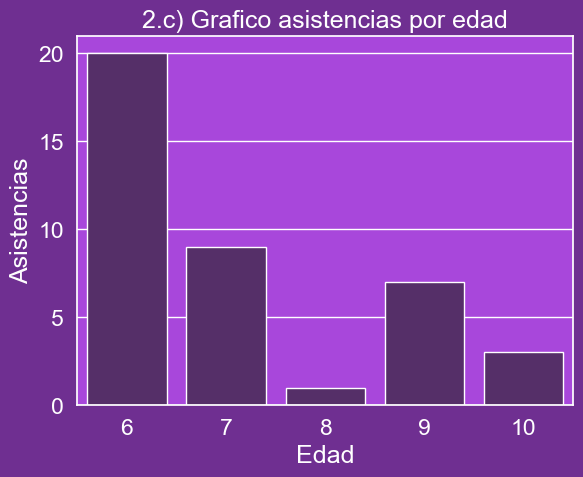

In [4]:

graficoAsistencias = sns.barplot(x = concurrenciasDF["Edad"], y = concurrenciasDF["ni"])
plt.title("2.c) Grafico asistencias por edad",fontdict={'color':'#ffffff'})
plt.ylabel("Asistencias")
plt.show()

### Ejercicio 2:
Crear un programa utilizando la librería matplotlib o Seaborn que realice lo siguiente:
### 2.a) Crear el siguiente DataFrame indexado:

In [5]:
listaIndices = ["L", "M", "X", "J", "V"]
listaCalorias = [420, 380, 390, 490, 300] 
listaTiempo = [60, 40, 75, 55, 45]

caloriasxTiempoDF = pd.DataFrame({"calorias": listaCalorias,
                                  "tiempo": listaTiempo},
                                 index = listaIndices)
print("2.a) El dataframe generado es: ")
print(caloriasxTiempoDF)

2.a) El dataframe generado es: 
   calorias  tiempo
L       420      60
M       380      40
X       390      75
J       490      55
V       300      45


### 2.b) Calcular la media, mediana, y desviación típica de ambas columnas.

In [6]:
print("2.b) La media, mediana y la desviacion tipica estan dadas en la siguiente tabla en ese mismo orden.")
print(caloriasxTiempoDF.agg(
    {
        "calorias": ["mean", "median", "std"],
        "tiempo": ["mean", "median", "std"],
    }
))


2.b) La media, mediana y la desviacion tipica estan dadas en la siguiente tabla en ese mismo orden.
          calorias     tiempo
mean    396.000000  55.000000
median  390.000000  55.000000
std      68.774995  13.693064


### 2.c) Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. El DataFrame resultante debe ser el siguiente:

In [7]:
caloriasxTiempoDF["reto"] = (caloriasxTiempoDF["calorias"] > 400) & (caloriasxTiempoDF["tiempo"] <= 60)
print("2.c) La tabla donde se aprecia quien cumplio el reto es: ")
print(caloriasxTiempoDF)

2.c) La tabla donde se aprecia quien cumplio el reto es: 
   calorias  tiempo   reto
L       420      60   True
M       380      40  False
X       390      75  False
J       490      55   True
V       300      45  False


### 2.d) Filtrar el DataFrame y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor de 400.

In [8]:
tiempoCon400cal = caloriasxTiempoDF[(caloriasxTiempoDF["calorias"] > 400) & ((caloriasxTiempoDF.reset_index().index.values % 2) == 1)]
print("2.d) El dataframe generado considerando solo las filas en las que se supero las 400 calorias y las filas son pares: ")
print(tiempoCon400cal)

2.d) El dataframe generado considerando solo las filas en las que se supero las 400 calorias y las filas son pares: 
   calorias  tiempo  reto
J       490      55  True


### 2.e) Crear a partir del DataFrame una serie con los porcentajes de días que se ha conseguido el reto y los que no.

In [9]:
serieProporcion = (caloriasxTiempoDF["reto"].value_counts(normalize=True).mul(100).astype(str)+'%')
print("2.e) La proporcion de dias en que se logro o no el reto esta dado por la serie: ")
print(serieProporcion)
print(type(serieProporcion))


2.e) La proporcion de dias en que se logro o no el reto esta dado por la serie: 
reto
False    60.0%
True     40.0%
Name: proportion, dtype: object
<class 'pandas.core.series.Series'>


### 2.f) Crear un gráfico como el de más abajo que muestre la progresión de las calorías y tiempo durante la semana.

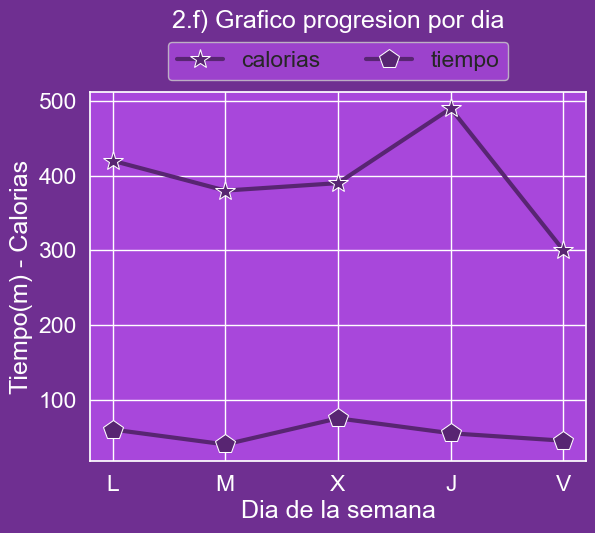

In [10]:
# sns.scatterplot(x = [caloriasxTiempoDF["calorias"], caloriasxTiempoDF["tiempo"]], 
#                 y = [caloriasxTiempoDF.index.values,caloriasxTiempoDF.index.values])
ax = sns.lineplot(data=caloriasxTiempoDF[["calorias","tiempo"]], 
                  markers=["*","p"], dashes=False, linewidth = 3, markersize=15)
plt.xlabel("Dia de la semana")
plt.ylabel("Tiempo(m) - Calorias")
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True)
plt.title("2.f) Grafico progresion por dia",y=1.15,fontdict={'color':'#ffffff'})
plt.show()